# Emotion Detection

### Importing the Necessary Libraries

In [75]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.preprocessing  import image
from tensorflow.keras import models
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras import layers, optimizers, models 
from keras.preprocessing.image import ImageDataGenerator

### Setting up Directories 

In [76]:
original_dataset_dir = 'emotion_recognition'
output_dataset_dir = 'data'
train_dir = os.path.join(original_dataset_dir, "train")
test_dir = os.path.join(original_dataset_dir, "test")
val_dir = os.path.join(original_dataset_dir, "validation")

In [77]:
import os
import shutil
import random

def list_valid_files(directory, valid_extensions=('.png', '.jpg', '.jpeg')):
    """
    Lists valid files in a directory, excluding unwanted files like '.DS_Store'.
    """
    return [
        file for file in os.listdir(directory)
        if file.lower().endswith(valid_extensions) and not file.startswith('.')
    ]

def create_folder_structure(base_dir, classes):
    """
    Create the folder structure for train, validation, and test datasets.
    """
    for split in ['train', 'validation', 'test']:
        for class_name in classes:
            path = os.path.join(base_dir, split, class_name)
            os.makedirs(path, exist_ok=True)
    print("Folder structure with class subfolders created successfully.")

def split_train_data(train_folder, output_base, classes, train_ratio=0.9, max_per_class=5000):
    """
    Split train folder images into new train and validation sets, with a limit on the number of images per class.

    Args:
        train_folder (str): Path to the original train folder.
        output_base (str): Path to the output folder base.
        classes (list): List of class names.
        train_ratio (float): Ratio of train data to total data.
        max_per_class (int): Maximum number of images per class to consider.
    """
    for class_name in classes:
        class_folder = os.path.join(train_folder, class_name)
        images = list_valid_files(class_folder)
        
        # Limit images to a maximum of max_per_class
        images = images[:max_per_class]
        
        # Shuffle and split images
        random.shuffle(images)
        split_index = int(len(images) * train_ratio)
        train_images = images[:split_index]
        validation_images = images[split_index:]
        
        # Copy images to respective folders
        for img in train_images:
            shutil.copy(os.path.join(class_folder, img), os.path.join(output_base, 'train', class_name))
        for img in validation_images:
            shutil.copy(os.path.join(class_folder, img), os.path.join(output_base, 'validation', class_name))
        
        print(f"Class '{class_name}': {len(train_images)} train, {len(validation_images)} validation.")

def copy_test_data(test_folder, output_base, classes):
    """
    Copy all images from the test folder to the new test folder.

    Args:
        test_folder (str): Path to the original test folder.
        output_base (str): Path to the output folder base.
        classes (list): List of class names.
    """
    for class_name in classes:
        class_folder = os.path.join(test_folder, class_name)
        images = list_valid_files(class_folder)
        
        for img in images:
            shutil.copy(os.path.join(class_folder, img), os.path.join(output_base, 'test', class_name))
    
    print("Test data copied successfully.")

def main():
    base_dir = "emotion_recognition"  # Base directory containing 'train' and 'test' folders
    output_base = "data"  # Base directory for new folder structure
    
    # Paths for original train and test folders
    train_folder = os.path.join(base_dir, 'train')
    test_folder = os.path.join(base_dir, 'test')
    
    # Get class names (subfolder names in train folder)
    classes = [
        folder for folder in os.listdir(train_folder)
        if os.path.isdir(os.path.join(train_folder, folder)) and not folder.startswith('.')
    ]
    
    # Create new folder structure
    create_folder_structure(output_base, classes)
    
    # Split train data into train and validation
    split_train_data(train_folder, output_base, classes)
    
    # Copy test data
    copy_test_data(test_folder, output_base, classes)
    
    print("Data preparation completed.")

if __name__ == "__main__":
    main()

Folder structure with class subfolders created successfully.
Class 'happy': 4500 train, 500 validation.
Class 'sad': 4347 train, 483 validation.
Class 'fear': 3687 train, 410 validation.
Class 'surprise': 2853 train, 318 validation.
Class 'neutral': 4468 train, 497 validation.
Class 'angry': 3595 train, 400 validation.
Class 'disgust': 392 train, 44 validation.
Test data copied successfully.
Data preparation completed.


### Classes Distribution Check

In [78]:
def classes_info(data_dir):
    """
    A function that provide information about the classes such names, numbers, and directories if needed
    
    :params
        train_dir (str): the training dataset directory
        
    :return
        returns classes labels, number of samples for each class, and directories of all classes
    """
    classes_names = [name for name in os.listdir(data_dir) if not name.startswith('.')]
    classes_data_dir = [os.path.join(data_dir, class_dir) for class_dir in classes_names]
    
    classes_numbers = [len(os.listdir(num)) for num in classes_data_dir]
    
    classes_numbers_dic = {}
    for num, name in enumerate(classes_names):
        classes_numbers_dic[name] = classes_numbers[num]  
    
    return(classes_numbers_dic, sum(classes_numbers), classes_data_dir)

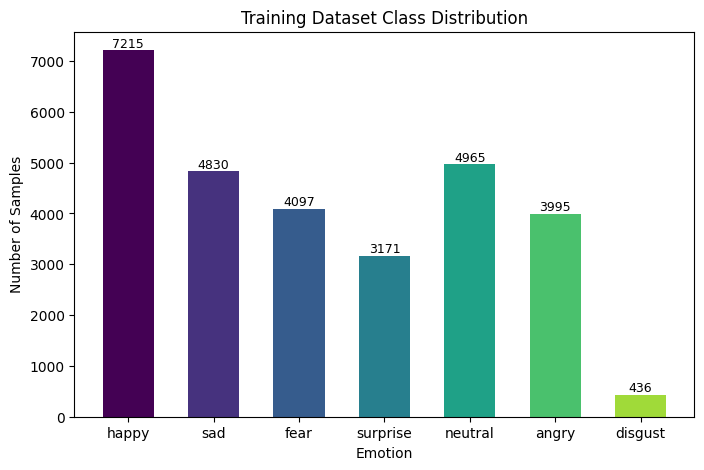

In [79]:
categories = list(classes_info(train_dir)[0].keys())
values = list(classes_info(train_dir)[0].values())


cmap = matplotlib.colormaps.get_cmap(cmap='viridis')
colors = [cmap(i / len(categories)) for i in range(len(categories))]

plt.figure(figsize=(8, 5))

plt.bar(categories, values, color=colors, width=0.6)

for i, value in enumerate(values):
    plt.text(i, value - 1, str(value), ha='center', va='bottom', color='Black', fontsize=9)

plt.title("Training Dataset Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")

plt.show()

In [80]:
print("The training dataset has {} image samples".format(classes_info(train_dir)[1]))

The training dataset has 28709 image samples


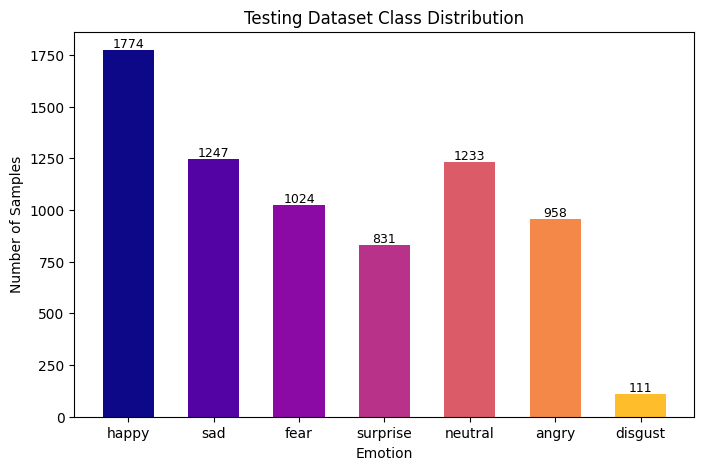

In [81]:
categories = list(classes_info(test_dir)[0].keys())
values = list(classes_info(test_dir)[0].values())

cmap = matplotlib.colormaps.get_cmap(cmap='plasma')
colors = [cmap(i / len(categories)) for i in range(len(categories))]

plt.figure(figsize=(8, 5))

plt.bar(categories, values, color=colors, width=0.6)

for i, value in enumerate(values):
    plt.text(i, value - 1, str(value), ha='center', va='bottom', color='Black', fontsize=9)

plt.title("Testing Dataset Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")

plt.show()

In [82]:
print("The testing dataset has {} image samples".format(classes_info(test_dir)[1]))

The testing dataset has 7178 image samples


## Displaying and Exploring Images

In [83]:
# Prepare the images directories 
train_directories = classes_info(train_dir)[2]
images_names = []
for directory in train_directories:
    images_names.append(os.listdir(directory))

In [84]:
# Load 5 image samples from each class

images = []

count = 5

for i, directory in enumerate(train_directories):
    for sample in images_names[i]:
        if count == 0:
            count = 5
            break
        else:
            im = image.load_img(
                os.path.join(os.path.join(directory, sample)),
                target_size=(48, 48),
                color_mode='grayscale'
            )
            
            im_array = image.img_to_array(im)
            images.append(im_array)
            count -= 1

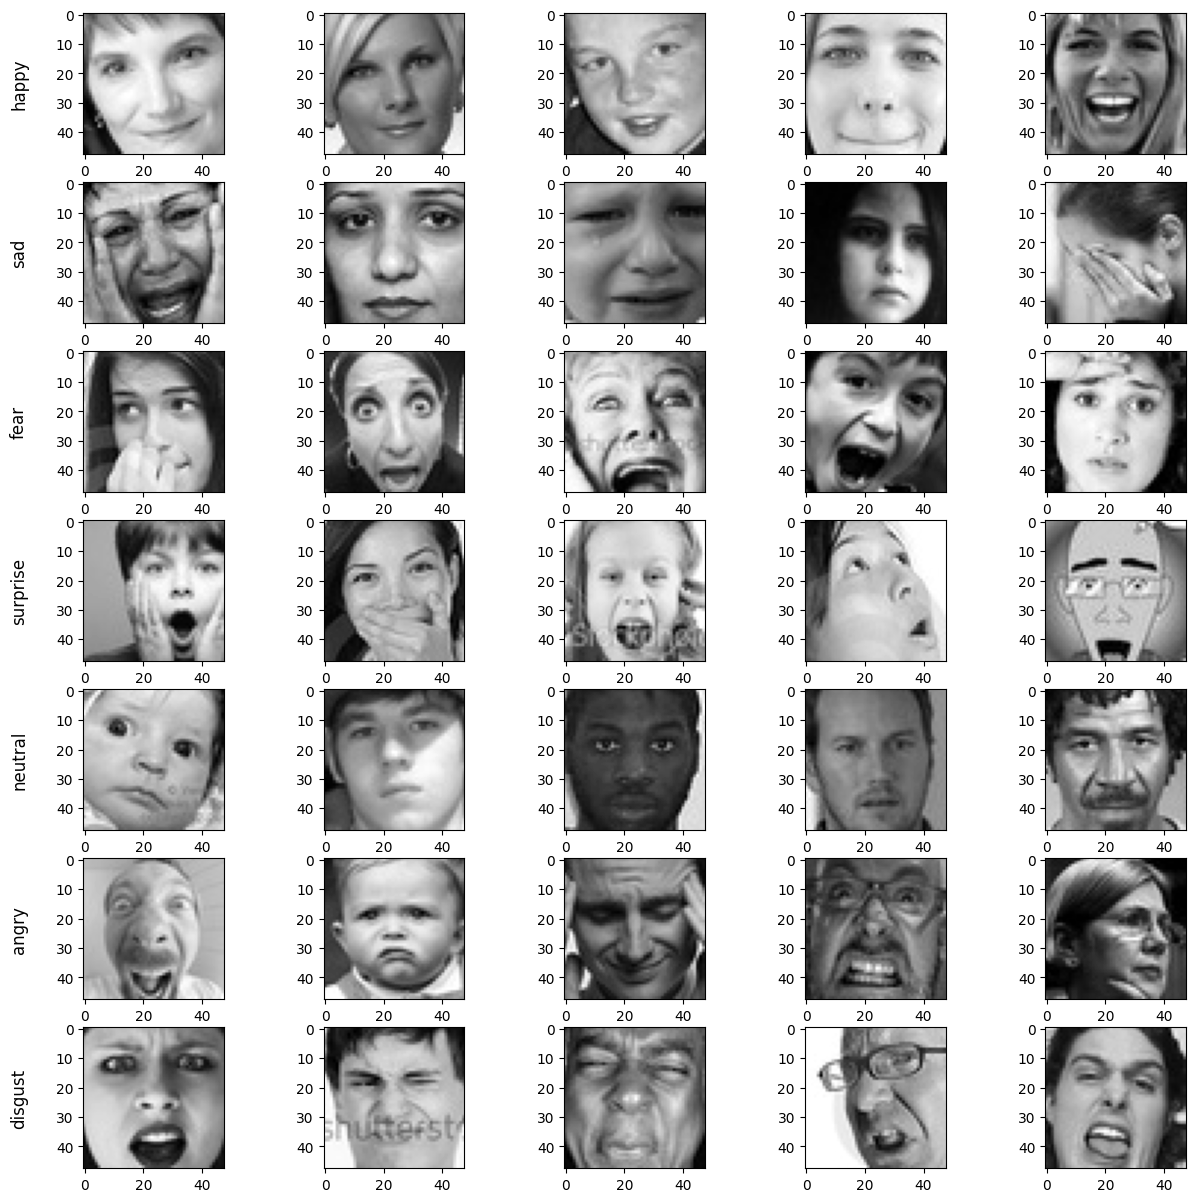

In [85]:
# Display 5 image samples from each class

fig, axes = plt.subplots(7, 5, figsize=(15, 15))
row_titles = list(classes_info(train_dir)[0].keys())

c = 0

for i in range(7):
    for j in range(5):
        ax = axes.flatten()[j + c]
        ax.imshow(images[j + c], cmap='gray')
    axes[i, 0].set_ylabel(row_titles[i], fontsize=12, labelpad=20)
    c += 5

## Uploading Datasets 

In [86]:
original_dataset_dir = 'emotion_recognition'
output_dataset_dir = 'data'
train_directory = os.path.join(output_dataset_dir, "train")
test_directory = os.path.join(output_dataset_dir, "test")
val_directory = os.path.join(output_dataset_dir, "validation")

In [60]:
x_train = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    image_size=(48, 48),
    batch_size=64,
    label_mode='categorical',
    color_mode='grayscale'
)


x_val = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    image_size=(48, 48),
    batch_size=64,
    label_mode='categorical',
    color_mode='grayscale'
)

x_test = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    image_size=(48, 48),
    batch_size=64,
    label_mode='categorical',
    color_mode='grayscale'
)


Found 23842 files belonging to 7 classes.
Found 2652 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


### Simple CNN Model

In [64]:
from keras import layers
from keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers


model = models.Sequential()
model.add(layers.Input(shape=(48, 48, 1)))
model.add(layers.Rescaling(1/255.))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))

In [54]:
#model.summary()

In [65]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = x_train.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)

In [66]:
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )

In [ ]:
history = model.fit(
    train_dataset_final,
    epochs=50,
    validation_data=x_val,
    verbose=1
    )

Epoch 1/50
373/373 [==============================] - 20s 55ms/step - loss: 2.2937 - accuracy: 0.3465 - val_loss: 2.7210 - val_accuracy: 0.3126
Epoch 2/50
373/373 [==============================] - 20s 55ms/step - loss: 2.3956 - accuracy: 0.3376 - val_loss: 2.1032 - val_accuracy: 0.3152
Epoch 3/50
373/373 [==============================] - 20s 53ms/step - loss: 2.4864 - accuracy: 0.3466 - val_loss: 1.9001 - val_accuracy: 0.3465
Epoch 4/50
373/373 [==============================] - 19s 51ms/step - loss: 2.5572 - accuracy: 0.3434 - val_loss: 2.2061 - val_accuracy: 0.3005
Epoch 5/50
373/373 [==============================] - 19s 50ms/step - loss: 2.8165 - accuracy: 0.3216 - val_loss: 2.5348 - val_accuracy: 0.2308
Epoch 6/50
373/373 [==============================] - 19s 51ms/step - loss: 2.8256 - accuracy: 0.3185 - val_loss: 2.7783 - val_accuracy: 0.2707
Epoch 7/50
373/373 [==============================] - 19s 52ms/step - loss: 2.8093 - accuracy: 0.3215 - val_loss: 2.6387 - val_accuracy:

In [59]:
model.evaluate(x_test)

57/57 [==============================] - 1s 22ms/step - loss: 494.2019 - accuracy: 0.5084


[494.201904296875, 0.508358895778656]

## Data Augmentation

In [45]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #preprocessing_function=lambda x: tf.image.rgb_to_grayscale(x) if x.shape[-1] == 3 else x
)

# Data Preparation for Testing (no augmentation)
testgen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# Data Generators for Training, Validation, and Testing
train_generator = datagen.flow_from_directory(
    train_directory,
    target_size=(48, 48),  # Resize all images to (48, 48)
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'  # Ensure images are loaded as grayscale
)

val_generator = testgen.flow_from_directory(
    val_directory,
    target_size=(48, 48),  # Resize all images to (48, 48)
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'  # Ensure images are loaded as grayscale
)

test_generator = testgen.flow_from_directory(
    test_directory,
    target_size=(48, 48),  # Resize all images to (48, 48)
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'  # Ensure images are loaded as grayscale
)

Found 23842 images belonging to 7 classes.
Found 2652 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Input(shape=(48, 48, 1)))
model.add(layers.Rescaling(1/255.))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))

In [ ]:
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=64,
    epochs=50,
    validation_data=val_generator,
    verbose=1
    )

In [ ]:
model.evaluate(test_generator)

## Pre-Trained Model VGG 16

In [69]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [70]:
conv_base.trainable = False


vgg = models.Sequential()
vgg.add(conv_base) 
vgg.add(layers.Flatten())
vgg.add(layers.Dense(256, activation='relu'))
vgg.add(layers.Dropout(0.25))
vgg.add(layers.Dense(128, activation='relu'))
vgg.add(layers.Dense(7, activation='softmax'))

In [71]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)

# Image rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)


# Prepare the training data generator
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
    #color_mode='grayscale'
)

# Prepare the validation data generator
validation_generator = test_datagen.flow_from_directory(
    val_directory,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
    #color_mode='grayscale'
)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
   # color_mode='grayscale'
)



Found 23842 images belonging to 7 classes.
Found 2652 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [74]:
# Compile the model
vgg.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc']
)

# Train the model using the generators
history = vgg.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
)

Epoch 1/60
746/746 [==============================] - 22s 29ms/step - loss: 45.4930 - acc: 0.2363 - val_loss: 3.3469 - val_acc: 0.1919
Epoch 2/60
746/746 [==============================] - 23s 31ms/step - loss: 52.4515 - acc: 0.2335 - val_loss: 2.4600 - val_acc: 0.1927
Epoch 3/60
746/746 [==============================] - 27s 36ms/step - loss: 58.8005 - acc: 0.2319 - val_loss: 4.5869 - val_acc: 0.1821
Epoch 4/60
746/746 [==============================] - 28s 38ms/step - loss: 59.9715 - acc: 0.2389 - val_loss: 3.6252 - val_acc: 0.1874
Epoch 5/60
746/746 [==============================] - 29s 39ms/step - loss: 74.5976 - acc: 0.2337 - val_loss: 5.1685 - val_acc: 0.2119
Epoch 6/60
746/746 [==============================] - 29s 39ms/step - loss: 85.2647 - acc: 0.2340 - val_loss: 4.6839 - val_acc: 0.1848
Epoch 7/60
746/746 [==============================] - 30s 40ms/step - loss: 85.4259 - acc: 0.2366 - val_loss: 4.8299 - val_acc: 0.1863
Epoch 8/60
746/746 [==============================] - 3

In [73]:
vgg.evaluate(test_generator)

225/225 [==============================] - 6s 26ms/step - loss: 3.0513 - acc: 0.1884


[3.051250696182251, 0.1883533000946045]

## Fine Tuning

In [66]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [67]:
vgg_tuned = models.Sequential()
vgg_tuned.add(conv_base) 
vgg_tuned.add(layers.Flatten())
vgg_tuned.add(layers.Dense(256, activation='relu'))
vgg_tuned.add(layers.Dropout(0.25))
vgg_tuned.add(layers.Dense(128, activation='relu'))
vgg_tuned.add(layers.Dense(7, activation='softmax'))

In [70]:
# Compile the model
vgg_tuned.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc']
)

# Train the model using the generators
history = vgg_tuned.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
)

Epoch 1/100
359/359 [==============================] - 295s 819ms/step - loss: 1.8526 - acc: 0.2440 - val_loss: 1.8143 - val_acc: 0.2472
Epoch 2/100
359/359 [==============================] - 332s 925ms/step - loss: 1.8112 - acc: 0.2513 - val_loss: 1.8131 - val_acc: 0.2472
Epoch 3/100
359/359 [==============================] - 380s 1s/step - loss: 1.8109 - acc: 0.2513 - val_loss: 1.8136 - val_acc: 0.2472
Epoch 4/100
359/359 [==============================] - 318s 885ms/step - loss: 1.8109 - acc: 0.2513 - val_loss: 1.8135 - val_acc: 0.2472
Epoch 5/100
359/359 [==============================] - 314s 874ms/step - loss: 1.8111 - acc: 0.2513 - val_loss: 1.8136 - val_acc: 0.2472
Epoch 6/100
359/359 [==============================] - 334s 930ms/step - loss: 1.8107 - acc: 0.2513 - val_loss: 1.8151 - val_acc: 0.2472
Epoch 7/100
204/359 [================>.............] - ETA: 2:56 - loss: 1.8159 - acc: 0.2458

KeyboardInterrupt: 

## Customized Model

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [59]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [60]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [51]:
model.fit(train_generator, epochs=20, batch_size=64, validation_data=val_generator)

Epoch 1/20


2025-01-08 17:58:45.476789: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


373/373 [==============================] - 59s 155ms/step - loss: 3.3621 - accuracy: 0.1894 - val_loss: 2.0681 - val_accuracy: 0.1825
Epoch 2/20
373/373 [==============================] - 74s 197ms/step - loss: 1.9904 - accuracy: 0.1950 - val_loss: 1.9304 - val_accuracy: 0.1859
Epoch 3/20
373/373 [==============================] - 80s 214ms/step - loss: 1.9811 - accuracy: 0.1944 - val_loss: 2.1267 - val_accuracy: 0.2010
Epoch 4/20
373/373 [==============================] - 80s 214ms/step - loss: 1.9675 - accuracy: 0.2008 - val_loss: 1.9159 - val_accuracy: 0.2172
Epoch 5/20
373/373 [==============================] - 84s 224ms/step - loss: 1.9927 - accuracy: 0.2012 - val_loss: 1.9907 - val_accuracy: 0.2010
Epoch 6/20
373/373 [==============================] - 84s 226ms/step - loss: 2.0090 - accuracy: 0.1963 - val_loss: 2.0427 - val_accuracy: 0.1780
Epoch 7/20
373/373 [==============================] - 83s 223ms/step - loss: 2.0069 - accuracy: 0.2036 - val_loss: 2.0386 - val_accuracy: 0.1

In [52]:
model.evaluate(test_generator)

113/113 [==============================] - 4s 33ms/step - loss: 1.9565 - accuracy: 0.2210


[1.956526517868042, 0.22095291316509247]

## Kaggle Solution

In [89]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [90]:
model.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [91]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [100]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48, 48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    #subset = "training"
                                                   )

test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size=(48, 48),
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  color_mode='grayscale',
                                                  
)



validation_generator = validation_datagen.flow_from_directory(directory = train_dir,
                                                              target_size = (48, 48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              #subset = "validation"
                                                             )
                                                            
                                                

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


'\nvalidation_generator = validation_datagen.flow_from_directory(directory = train_dir,\n                                                              target_size = (48, 48),\n                                                              batch_size = 64,\n                                                              color_mode = "grayscale",\n                                                              class_mode = "categorical",\n                                                              #subset = "validation"\n                                                             )\n                                                             '

In [101]:
history = model.fit(train_generator, epochs=20)

Epoch 1/20
449/449 [==============================] - 53s 117ms/step - loss: 1.2465 - accuracy: 0.6225
Epoch 2/20
449/449 [==============================] - 58s 128ms/step - loss: 1.2461 - accuracy: 0.6204
Epoch 3/20
449/449 [==============================] - 66s 148ms/step - loss: 1.2428 - accuracy: 0.6229
Epoch 4/20
449/449 [==============================] - 72s 161ms/step - loss: 1.2410 - accuracy: 0.6226
Epoch 5/20
449/449 [==============================] - 69s 153ms/step - loss: 1.2428 - accuracy: 0.6187
Epoch 6/20
449/449 [==============================] - 68s 152ms/step - loss: 1.2385 - accuracy: 0.6243
Epoch 7/20
449/449 [==============================] - 66s 148ms/step - loss: 1.2356 - accuracy: 0.6210
Epoch 8/20
449/449 [==============================] - 67s 148ms/step - loss: 1.2309 - accuracy: 0.6217
Epoch 9/20
449/449 [==============================] - 67s 149ms/step - loss: 1.2351 - accuracy: 0.6235
Epoch 10/20
449/449 [==============================] - 67s 150ms/step - l

In [102]:
model.evaluate(test_generator)

113/113 [==============================] - 4s 32ms/step - loss: 1.2389 - accuracy: 0.6145


[1.2389196157455444, 0.61451655626297]

In [35]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation accuracy and loss from the training history.

    Args:
        history: The history object returned by the model's fit method.
    """
    # Extract metrics from history
    accuracy = history.history.get('acc') or history.history.get('accuracy')
    val_accuracy = history.history.get('val_acc') or history.history.get('val_accuracy')
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(accuracy) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example Usage:
# Assuming `history` is the output from model.fit(...)
plot_training_history(history)

KeyError: 'val_loss'

In [110]:
import pickle

# Save history to a file
#with open('model_history_62.pkl', 'wb') as file:
    #pickle.dump(history.history, file)

In [112]:
#model.save("facial_recognition_62.h5")
#model.save("facial_recognition_62.keras")

In [2]:
#model = tf.keras.models.load_model("facial_recognition_62.h5")

In [97]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes 

113/113 [==============================] - 4s 30ms/step


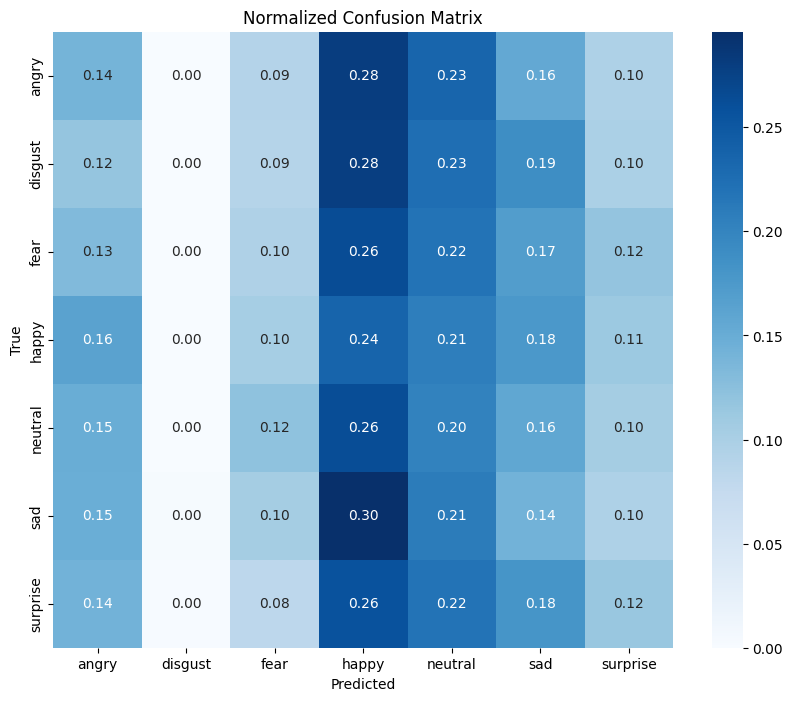

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define class labels
class_names = list(test_generator.class_indices.keys())

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

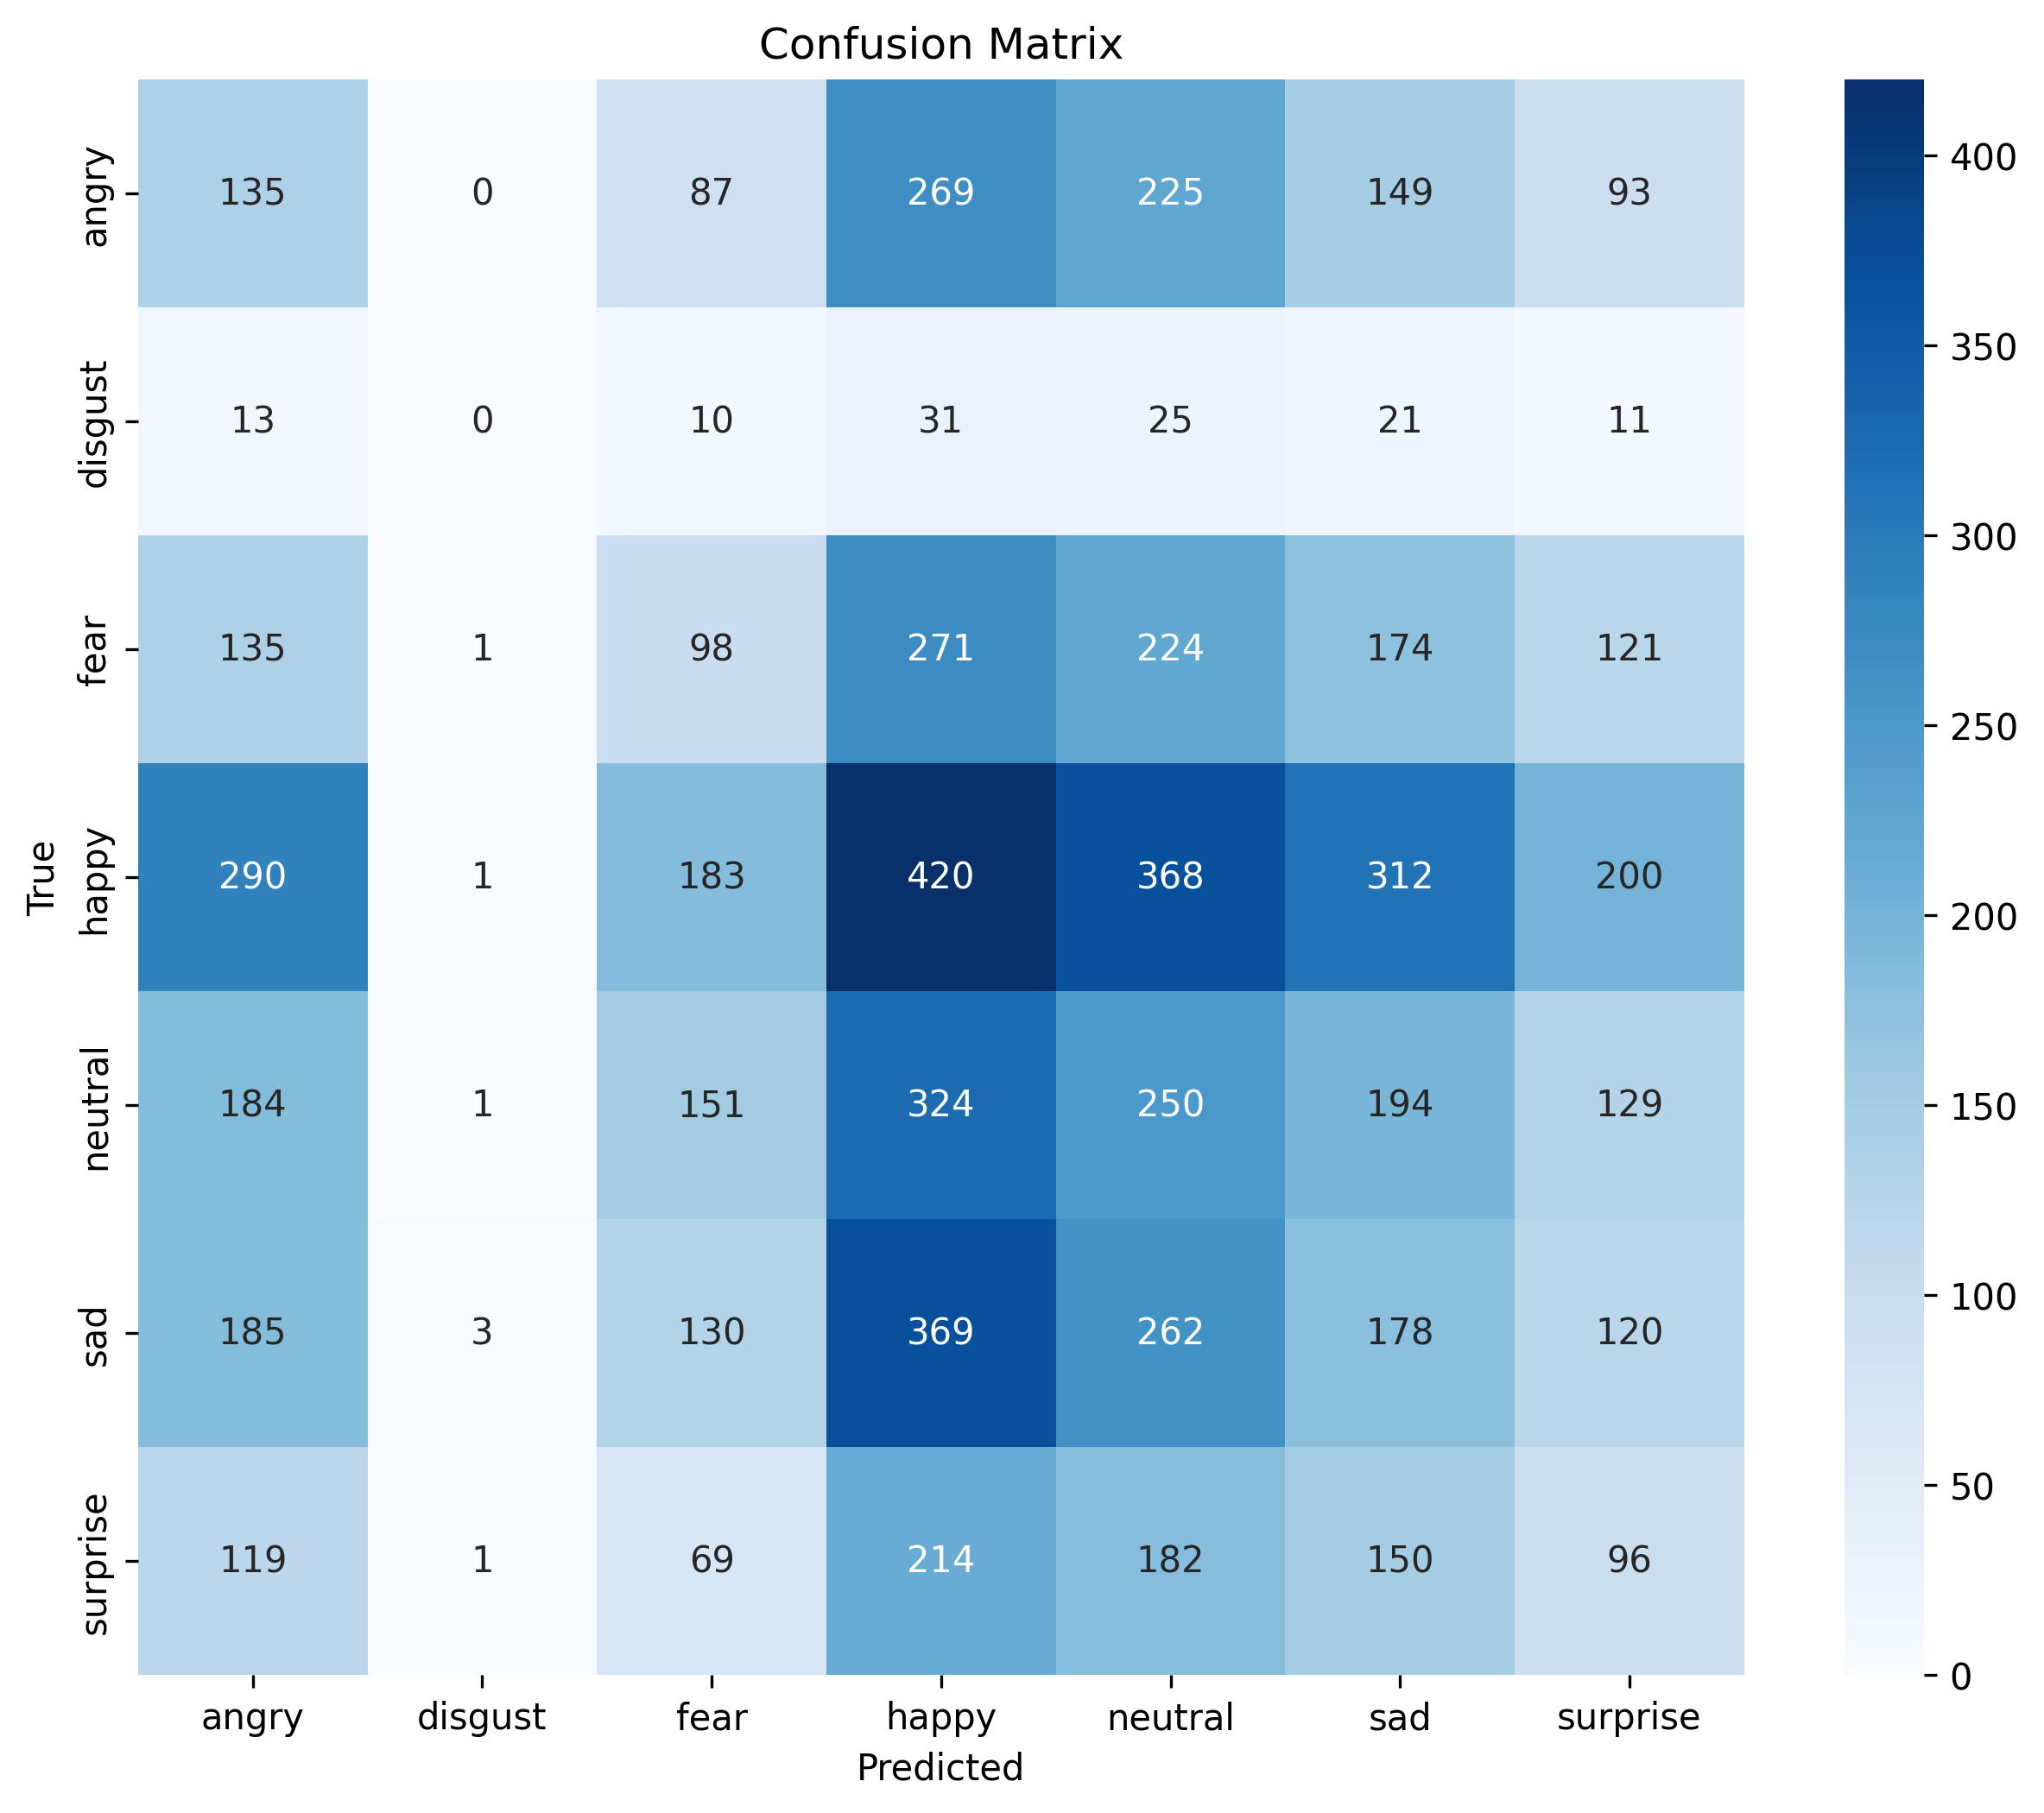

In [98]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)


import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# VGGNet Variant

In [166]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
vggnet = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Final layer for classification
])


In [171]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (50, 50),
                                                    batch_size = 64,
                                                    #color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory(directory = test_dir,
                                                              target_size = (50, 50),
                                                              batch_size = 64,
                                                              #color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(50, 50),
    batch_size=64,
    class_mode='categorical'
   # color_mode='grayscale'
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [168]:
vggnet.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [169]:
vggnet_history = vggnet.fit(train_generator, steps_per_epoch= 358, epochs=60, validation_data=validation_generator)

Epoch 1/60
358/358 [==============================] - 24s 67ms/step - loss: 2.3623 - accuracy: 0.1965 - val_loss: 1.7616 - val_accuracy: 0.2723
Epoch 2/60
358/358 [==============================] - 25s 69ms/step - loss: 2.0441 - accuracy: 0.2385 - val_loss: 1.7120 - val_accuracy: 0.3010
Epoch 3/60
358/358 [==============================] - 24s 67ms/step - loss: 1.9223 - accuracy: 0.2583 - val_loss: 1.6886 - val_accuracy: 0.3115
Epoch 4/60
358/358 [==============================] - 24s 68ms/step - loss: 1.8766 - accuracy: 0.2659 - val_loss: 1.6696 - val_accuracy: 0.3317
Epoch 5/60
358/358 [==============================] - 26s 73ms/step - loss: 1.8430 - accuracy: 0.2761 - val_loss: 1.6628 - val_accuracy: 0.3282
Epoch 6/60
358/358 [==============================] - 28s 79ms/step - loss: 1.8201 - accuracy: 0.2860 - val_loss: 1.6600 - val_accuracy: 0.3317
Epoch 7/60
358/358 [==============================] - 32s 90ms/step - loss: 1.7993 - accuracy: 0.2883 - val_loss: 1.6435 - val_accuracy:

In [172]:
.evaluate(test_generator)

113/113 [==============================] - 5s 48ms/step - loss: 1.5736 - accuracy: 0.3902


[1.573586106300354, 0.39022010564804077]

## Resnet

In [113]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48, 48),
                                                    batch_size = 64,
                                                    #color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )

test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size=(48, 48),
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  #color_mode='grayscale',
                                                  
)



validation_generator = validation_datagen.flow_from_directory(directory = train_dir,
                                                              target_size = (48, 48),
                                                              batch_size = 64,
                                                              #color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )
                                                            
                                                

Found 22968 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [116]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_11[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 6, 6, 512)            0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 3, 3, 256)            590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 3, 3, 1024)           525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 3, 3, 1024)           0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 3, 3, 256)            262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 3, 3, 1024)           4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 3, 3, 1024)           0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 3, 3, 1024)           0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 2, 2, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [117]:
# Initially, set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze layers starting from a specific layer
trainable = False  # Flag to control when to start making layers trainable
for layer in base_model.layers:
    if layer.name == "conv3_block1_1_conv":  # Correct layer name
        trainable = True
    if trainable:
        layer.trainable = True

In [118]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load Pre-trained ResNet Model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(48, 48, 3)  # FER-2013 images are 48x48
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pool features globally
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Output layer for 7 emotion classes
])

# Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [119]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
359/359 [==============================] - 29s 77ms/step - loss: 2.1649 - accuracy: 0.2006 - val_loss: 1.8278 - val_accuracy: 0.2512
Epoch 2/20
359/359 [==============================] - 27s 75ms/step - loss: 1.8522 - accuracy: 0.2265 - val_loss: 1.8640 - val_accuracy: 0.2526
Epoch 3/20
359/359 [==============================] - 28s 77ms/step - loss: 1.8321 - accuracy: 0.2319 - val_loss: 1.8105 - val_accuracy: 0.2534
Epoch 4/20
359/359 [==============================] - 30s 83ms/step - loss: 1.8243 - accuracy: 0.2375 - val_loss: 1.8282 - val_accuracy: 0.2548
Epoch 5/20
359/359 [==============================] - 31s 87ms/step - loss: 1.8158 - accuracy: 0.2404 - val_loss: 1.8311 - val_accuracy: 0.2533
Epoch 6/20
359/359 [==============================] - 33s 92ms/step - loss: 1.8130 - accuracy: 0.2464 - val_loss: 1.8322 - val_accuracy: 0.2555
Epoch 7/20
359/359 [==============================] - 33s 91ms/step - loss: 1.8088 - accuracy: 0.2477 - val_loss: 1.7897 - val_accuracy:

In [120]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
359/359 [==============================] - 33s 92ms/step - loss: 1.7796 - accuracy: 0.2663 - val_loss: 1.7717 - val_accuracy: 0.2723
Epoch 2/100
359/359 [==============================] - 33s 91ms/step - loss: 1.7748 - accuracy: 0.2698 - val_loss: 1.7654 - val_accuracy: 0.2686
Epoch 3/100
359/359 [==============================] - 33s 92ms/step - loss: 1.7739 - accuracy: 0.2721 - val_loss: 1.7648 - val_accuracy: 0.2752
Epoch 4/100
359/359 [==============================] - 33s 92ms/step - loss: 1.7724 - accuracy: 0.2713 - val_loss: 1.7666 - val_accuracy: 0.2827
Epoch 5/100
359/359 [==============================] - 33s 92ms/step - loss: 1.7726 - accuracy: 0.2738 - val_loss: 1.7635 - val_accuracy: 0.2764
Epoch 6/100
359/359 [==============================] - 33s 92ms/step - loss: 1.7732 - accuracy: 0.2715 - val_loss: 1.7782 - val_accuracy: 0.2747
Epoch 7/100
359/359 [==============================] - 33s 93ms/step - loss: 1.7718 - accuracy: 0.2732 - val_loss: 1.7726 - val_ac

359/359 [==============================] - 36s 99ms/step - loss: 1.7424 - accuracy: 0.2862 - val_loss: 1.7943 - val_accuracy: 0.2820
Epoch 58/100
359/359 [==============================] - 36s 100ms/step - loss: 1.7486 - accuracy: 0.2888 - val_loss: 1.7873 - val_accuracy: 0.2907
Epoch 59/100
359/359 [==============================] - 36s 100ms/step - loss: 1.7468 - accuracy: 0.2872 - val_loss: 1.7793 - val_accuracy: 0.3001
Epoch 60/100
359/359 [==============================] - 36s 100ms/step - loss: 1.7472 - accuracy: 0.2875 - val_loss: 1.7830 - val_accuracy: 0.2820
Epoch 61/100
359/359 [==============================] - 36s 100ms/step - loss: 1.7471 - accuracy: 0.2905 - val_loss: 1.7919 - val_accuracy: 0.2907
Epoch 62/100
359/359 [==============================] - 36s 100ms/step - loss: 1.7462 - accuracy: 0.2872 - val_loss: 1.8100 - val_accuracy: 0.2820
Epoch 63/100
359/359 [==============================] - 36s 100ms/step - loss: 1.7439 - accuracy: 0.2907 - val_loss: 1.8060 - val_ac

# ChatGPT Solution

In [121]:
#train_dir = 'path_to_train_data'
val_dir = "data/validation"
#test_dir = 'path_to_test_data'

img_size = (48, 48)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 5022 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [122]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # FER-2013 has 7 emotion classes
])

In [124]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [125]:
epochs = 50

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/50
897/897 [==============================] - 31s 34ms/step - loss: 1.9516 - accuracy: 0.2292 - val_loss: 1.7690 - val_accuracy: 0.2498
Epoch 2/50
897/897 [==============================] - 28s 31ms/step - loss: 1.7869 - accuracy: 0.2759 - val_loss: 1.7579 - val_accuracy: 0.2618
Epoch 3/50
897/897 [==============================] - 29s 32ms/step - loss: 1.7506 - accuracy: 0.2955 - val_loss: 1.7435 - val_accuracy: 0.2716
Epoch 4/50
897/897 [==============================] - 31s 35ms/step - loss: 1.7353 - accuracy: 0.3017 - val_loss: 1.7442 - val_accuracy: 0.2742
Epoch 5/50
897/897 [==============================] - 32s 36ms/step - loss: 1.7141 - accuracy: 0.3137 - val_loss: 1.7239 - val_accuracy: 0.2887
Epoch 6/50
897/897 [==============================] - 35s 39ms/step - loss: 1.7118 - accuracy: 0.3128 - val_loss: 1.7021 - val_accuracy: 0.3051
Epoch 7/50
897/897 [==============================] - 37s 41ms/step - loss: 1.7067 - accuracy: 0.3190 - val_loss: 1.6830 - val_accuracy:

### Kod 5 . 2 : Evrişimli sinir ağına sınıflandırıcı eklemek

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

### Kod 5.3: Evrişimli sinir ağını MNIST resimlerinde eğitmek

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
## Test verilerinde değerlendirelim:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 6, figsize=(15, 15))
i = 0
c = 0
for layer in range(4):
    feature_map_model = models.Model(inputs=model.inputs, outputs=model.layers[layer].output)
    sample_image = np.expand_dims(train_images[0], axis=0)
    feature_maps = feature_map_model.predict(sample_image, verbose=0)
    for i in range(6):
        ax = axes.flatten()[i + c]
        ax.imshow(feature_maps[0, :, :, i], cmap='binary')
    c += 6
plt.show()

## Dogs vs. Cats

Dataset: https://www.kaggle.com/c/dogs-vs-cats/data#

### Veri setlerini hazırlamak

In [ ]:
import shutil

In [ ]:
shutil.rmtree("cats_and_dogs_small")

In [ ]:
import os
import shutil

# Paths to the original dataset and the output directory
original_dataset_dir = 'emotion_recognition'
output_dataset_dir = 'data'

# Directories for the train and test splits in the original dataset
original_train_dir = os.path.join(original_dataset_dir, 'train')
original_test_dir = os.path.join(original_dataset_dir, 'test')

# Directories for the output balanced dataset
output_train_dir = os.path.join(output_dataset_dir, 'train')
output_validation_dir = os.path.join(output_dataset_dir, 'validation')
output_test_dir = os.path.join(output_dataset_dir, 'test')

# Create output directories
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_validation_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

# Step 1: Process training and validation datasets
max_images_per_class = 600

for class_name in sorted(os.listdir(original_train_dir)):  # Ensure consistent order
    class_path = os.path.join(original_train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Create directories for this class in train and validation
    train_class_dir = os.path.join(output_train_dir, class_name)
    validation_class_dir = os.path.join(output_validation_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)

    # Get all images in the class and sort them for reproducibility
    images = sorted(os.listdir(class_path))

    # Limit to max_images_per_class
    selected_images = images[:max_images_per_class]

    # Split into training (80%) and validation (20%)
    split_index = int(0.8 * len(selected_images))
    train_images = selected_images[:split_index]
    validation_images = selected_images[split_index:]

    # Copy images to the respective directories
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copy(src, dst)

    for img in validation_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(validation_class_dir, img)
        shutil.copy(src, dst)

# Step 2: Copy the test dataset unchanged
for class_name in sorted(os.listdir(original_test_dir)):  # Ensure consistent order
    class_path = os.path.join(original_test_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Create directory for this class in the output test directory
    test_class_dir = os.path.join(output_test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy all images
    for img in sorted(os.listdir(class_path)):  # Sorted for reproducibility
        src = os.path.join(class_path, img)
        dst = os.path.join(test_class_dir, img)
        shutil.copy(src, dst)

# Summary
print("Balanced dataset created successfully!")
print(f"Balanced train directory: {output_train_dir}")
print(f"Validation directory: {output_validation_dir}")
print(f"Test directory (unchanged): {output_test_dir}")

In [ ]:
import os
import shutil
import random

# Paths to the original dataset and the output directory
original_dataset_dir = 'emotion_recognition'
output_dataset_dir = 'data'

# Directories for the train and test splits in the original dataset
original_train_dir = os.path.join(original_dataset_dir, 'train')
original_test_dir = os.path.join(original_dataset_dir, 'test')

# Directories for the output balanced dataset
output_train_dir = os.path.join(output_dataset_dir, 'train')
output_validation_dir = os.path.join(output_dataset_dir, 'validation')
output_test_dir = os.path.join(output_dataset_dir, 'test')

# Create output directories
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_validation_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

# Step 1: Balance the training dataset by sampling classes to the minority class level
class_counts = {}
for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Find the minimum number of samples among all classes
min_samples = min(class_counts.values())

# Process each class
for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Create directories for this class in train and validation
    train_class_dir = os.path.join(output_train_dir, class_name)
    validation_class_dir = os.path.join(output_validation_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)

    # Get all images in the class and randomly shuffle them
    images = os.listdir(class_path)
    random.shuffle(images)

    # Select min_samples images
    selected_images = images[:min_samples]

    # Split into training (80%) and validation (20%)
    split_index = int(0.8 * len(selected_images))
    train_images = selected_images[:split_index]
    validation_images = selected_images[split_index:]

    # Copy images to the respective directories
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copy(src, dst)

    for img in validation_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(validation_class_dir, img)
        shutil.copy(src, dst)

# Step 2: Copy the test dataset unchanged
for class_name in os.listdir(original_test_dir):
    class_path = os.path.join(original_test_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Create directory for this class in the output test directory
    test_class_dir = os.path.join(output_test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy all images
    for img in os.listdir(class_path):
        src = os.path.join(class_path, img)
        dst = os.path.join(test_class_dir, img)
        shutil.copy(src, dst)

# Summary
print("Balanced dataset created successfully!")
print(f"Balanced train directory: {output_train_dir}")
print(f"Validation directory: {output_validation_dir}")
print(f"Test directory (unchanged): {output_test_dir}")

#### Eğitim, doğrulama ve test veri setlerinde kaçar adet resim olduğunu sayalım:

In [ ]:
import os

# Paths to the training and validation directories
train_dir = 'data/train/'
validation_dir = 'data/validation/'

def count_images(directory):
    """
    Counts the number of images in each class within the specified directory.
    """
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in training and validation directories
train_counts = count_images(train_dir)
validation_counts = count_images(validation_dir)

# Display the results
print("Training Set:")
for class_name, count in train_counts.items():
    print(f"  {class_name}: {count} images")

print("\nValidation Set:")
for class_name, count in validation_counts.items():
    print(f"  {class_name}: {count} images")

#### Ağı Inşa Etmek

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
from tensorflow import optimizers
adam = optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

## Veri Önişleme
1. Resim dosyalarını oku.
2. JPEG içerigini kodçözerek RGB görüntü noktalarina dönüştür.
3. Bu noktalari ondalık tensörlerine dönüştür.
4. Görüntü noktalarinn değerlerini (0 ile 255 arasında) yeniden ölçekle ([0, 1]
araligina).

### ImageDataGenerator kullanarak dizinden resimlerin okunması

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
#Resizes all images to 150 × 150
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(48, 48), batch_size=20,class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(validation_dir,target_size=(48, 48), batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(48, 48), batch_size=20, class_mode='categorical')

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

### Yigin üreteci kullanarak modeli uydurmak

In [ ]:
history = model.fit(x_train, validation_data=x_val, epochs=100)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Veri Seti Çeşitlendirme

#### ImageDataGenerator ile veri seti çeşitlendirmenin yapılması

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#### Çeşitlendirilmiş eğitim resimlerini görüntülemek

In [ ]:
from keras.preprocessing import image
fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]
img_path = fnames[5]
img = image.load_img(img_path, target_size=(48, 48))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
fig, axes = plt.subplots(2,2, figsize=(10, 8))
for batch in datagen.flow(x, batch_size=1):
    ax = axes.flatten()[i]
    i += 1
    ax.imshow(image.array_to_img(batch[0]))
    if i % 4 == 0:
        break

#### İletim sönümi eklemek

In [ ]:
from tensorflow.keras import layers, optimizers, models 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

#### Evrişimli sinir ağini veri seti çeşitlendirme üreteci ile eğitmek

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


train_generator = train_datagen.flow_from_directory(
    ttest_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    ttest_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

In [ ]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

In [ ]:
history = model.fit(
train_generator,
epochs=100,
validation_data=validation_generator)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.preprocessing import image
from tensorflow.keras import Input
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
im = image.load_img("dog.jpg", target_size=(150, 150))
image_tensor = image.img_to_array(im)
image_tensor = np.expand_dims(image_tensor, axis=0)
image_tensor = image_tensor/255.0

plt.imshow(image_tensor[0])
plt.axis('off') 

plt.show()

In [ ]:
classes = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
classes[round(model.predict(image_tensor, verbose=0)[0][0])]

In [ ]:
# Define Grad-CAM function
def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.001):


    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.image.resize(jet_heatmap, (img.shape[0], img.shape[1]))
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    
    #heatmap=cv2.resize(np.array (heatmap), (150,150))

    superimposed_img = jet_heatmap * 0.005 + img * (1 - alpha)
    superimposed_img = np.uint8(255 * superimposed_img / np.max(superimposed_img))

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()


last_conv_layer_name = 'max_pooling2d_9'  # Name of the last convolutional layer in your model
heatmap = get_gradcam_heatmap(model, image_tensor, last_conv_layer_name)

display_gradcam(image_tensor[0], heatmap)

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2

# Load the base model with pretrained weights from ImageNet
conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to retain pretrained features
conv_base.trainable = False

# Create the new model
image_net = models.Sequential()
image_net.add(conv_base)  # Add the pretrained base
image_net.add(layers.Flatten())  # Flatten the output
image_net.add(layers.Dense(256, activation='relu'))  # Fully connected layer
image_net.add(layers.Dense(7, activation='softmax'))  # Output layer for 7 classes

# Compile the model
image_net.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
image_net.summary()

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16

# Function to extract features using a pre-trained model
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))  # Placeholder for feature maps
    labels = np.zeros(shape=(sample_count))              # Placeholder for labels
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)  # Predict features using the model
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break  # Stop once the desired sample count is reached
    
    return features, labels

# Extract features for training, validation, and test datasets

train_features, train_labels = extract_features(train_dir, 2436)
validation_features, validation_labels = extract_features(validation_dir, 616)
test_features, test_labels = extract_features(test_dir, 7178)


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (616, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [ ]:
model.summary()

### Listing 5.21 Training the model end to end with a frozen convolutional base

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# Image data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)


# Prepare the training data generator
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
    #color_mode='grayscale'
)

# Prepare the validation data generator
validation_generator = test_datagen.flow_from_directory(
    val_directory,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
    #color_mode='grayscale'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
   # color_mode='grayscale'
)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.legacy.Adam(learning_rate=2e-5),
    metrics=['acc']
)

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

In [ ]:
model.evaluate(test_generator)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)


# Prepare the training data generator
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Prepare the validation data generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.legacy.Adam(learning_rate=2e-5),
    metrics=['acc']
)

history_net = image_net.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
)

### 5.3.2 Fine-tuning

In [ ]:
conv_base.summary()

### Listing 5.22 Freezing all layers up to a specific one

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
)


### Listing 5.23 Fine-tuning the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.legacy.RMSprop(learning_rate=1e-5), metrics=['acc'])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Listing 5.24 Smoothing the plots

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting training and validation accuracy
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Create a new figure for loss plots
plt.figure()

# Plotting training and validation loss
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

# Show the plots
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: {}%'.format(round((test_acc * 100), 2)))

In [ ]:
model.save("fine_tuned_98.h5")

### 5.4.1 Visualizing intermediate activations

In [ ]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

### Listing 5.25 Preprocessing a single image

In [ ]:
img_path = '/Users/mohamedalfatih/Downloads/cats_dogs/dogs-vs-cats-2/kaggle_original_data/train/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

# Preprocess the image into a 4D tensor
img = image.load_img(img_path, target_size=(150, 150))  # Load the image and resize to 150x150
img_tensor = image.img_to_array(img)  # Convert image to a tensor
img_tensor = np.expand_dims(img_tensor, axis=0)  # Add an extra dimension to match batch format
img_tensor /= 255.  # Normalize pixel values to range [0, 1]

# Print the shape of the tensor
print(img_tensor.shape)  # Output: (1, 150, 150, 3)

### Listing 5.26 Displaying the test picture

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

### Listing 5.27 Instantiating a model from an input tensor and a list of output tensors

In [ ]:
model.summary()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Listing 5.28 Running the model in predict mode

In [ ]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

### Listing 5.29 Visualizing the fourth channel

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

### Listing 5.30 Visualizing the seventh channel

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

### Listing 5.31 Visualizing every channel in every intermediate activation

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)  # Names of the layers for plotting

images_per_row = 16  # Number of images per row

# Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # Number of features in the feature map
    size = layer_activation.shape[1]  # Size of the feature map (assumes square shape)

    # Create a grid to display the feature maps
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            # Post-process the feature map for better visualization
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            # Place each feature map in the grid
            display_grid[col * size: (col + 1) * size,
                         row * size: (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Listing 5.32 Defining the loss tensor for filter visualization

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = base.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

### Listing 5.33 Obtaining the gradient of the loss with regard to the input

In [ ]:
input_image = tf.Variable(tf.random.uniform((1, 150, 150, 3), minval=0.0, maxval=1.0))

# Compute gradients
with tf.GradientTape() as tape:
    tape.watch(input_image)
    # Run the model on the input image
    outputs = model(input_image)
    # Calculate the loss
    activation = outputs[:, :, :, filter_index]
    loss_value = tf.reduce_mean(activation)

# Calculate the gradient of the loss with respect to the input image
grads = tape.gradient(loss_value, input_image)

### Listing 5.34 Gradient-normalization trick

In [ ]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

### Listing 5.37 Utility function to convert a tensor into a valid image

In [ ]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

### Listing 5.38 Function to generate filter visualizations

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16

# Load the VGG16 model
model = VGG16(weights="imagenet", include_top=False)

# Helper function to deprocess the image
def deprocess_image(x):
    # Normalize the tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # Clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # Convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Function to generate a pattern for a specific filter
def generate_pattern(layer_name, filter_index, size=150):
    # Get the specified layer output
    layer_output = model.get_layer(layer_name).output

    # Create a model that outputs the specified layer
    feature_extractor = tf.keras.Model(inputs=model.input, outputs=layer_output)

    # Define a random input image
    input_img_data = tf.random.uniform((1, size, size, 3), minval=0, maxval=1)

    # Gradient ascent step size
    step = 1.0

    # Perform 40 iterations of gradient ascent
    for i in range(40):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            # Compute the loss as the mean activation of the specified filter
            outputs = feature_extractor(input_img_data)
            loss = tf.reduce_mean(outputs[:, :, :, filter_index])

        # Compute the gradients of the loss with respect to the input image
        grads = tape.gradient(loss, input_img_data)

        # Normalize the gradients
        grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

        # Update the input image with the gradient ascent step
        input_img_data += grads * step

    # Deprocess and return the image
    img = input_img_data[0].numpy()
    return deprocess_image(img)

### Listing 5.39 Generating a grid of all filter response patterns in a layer

In [ ]:
layer_name = 'block1_conv1'
size = 64
margin = 5

# Create a grid to store the results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# Iterate over the rows and columns of the grid
for i in range(8):
    for j in range(8):
        # Generate a pattern for the (i + j * 8)-th filter
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        # Calculate the placement in the grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size

        # Place the filter image in the grid
        results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

### Listing 5.40 Loading the VGG16 network with pretrained weights

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

### Listing 5.41 Preprocessing an input image for VGG16

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = '/Users/mohamedalfatih/Downloads/cats_dogs/dogs-vs-cats-2/elephent.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
original = image.img_to_array(im)

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
model.summary()

### Listing 5.42 Setting up the Grad-CAM algorithm

In [ ]:
african_elephant_output = model.output[:, 386]
last_conv_layer_name = model.get_layer('block5_pool').name

In [ ]:
# Define Grad-CAM function
def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.9):


    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.image.resize(jet_heatmap, (img.shape[0], img.shape[1]))
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    
    #heatmap=cv2.resize(np.array (heatmap), (150,150))

    superimposed_img = jet_heatmap * 0.15 + img * (1 - alpha)
    superimposed_img = np.uint8(255 * superimposed_img / np.max(superimposed_img))

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

heatmap = get_gradcam_heatmap(model, x, last_conv_layer_name)

display_gradcam(original, heatmap)

In [ ]:
img_path = '/Users/mohamedalfatih/Downloads/cats_dogs/dogs-vs-cats-2/cats_and_dogs_small/train/dogs/dog.190.jpg'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.

plt.imshow(x[0])
plt.axis("off")
plt.show()

In [ ]:
base_conv = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
base_conv.summary()


In [ ]:
model = models.Sequential()
model.add(Input(shape=(150, 150, 3)))

In [ ]:
for i in range(len(base_conv.layers)):
    if i + 7 > len(base_conv.layers):
        break
    model.add(base_conv.layers[i + 1])

In [ ]:
trainable_flag = False

for layer in model.layers:
    if layer.name == "block5_conv1":
        trainable_flag = True
    if trainable_flag == True:
        layer.trainable = trainable_flag
    else:
        layer.trainable = trainable_flag

In [ ]:
model.summary()

In [ ]:
last_conv_layer_name = "conv2d_13"

In [ ]:
model.add(layers.Conv2D(512, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.legacy.RMSprop(learning_rate=1e-5), metrics=['acc'])
history = model.fit(train_generator, steps_per_epoch=100, epochs=10, validation_data=validation_generator, validation_steps=50)

In [ ]:
model.evaluate(test_generator)

In [ ]:
# Define Grad-CAM function
def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.0005):


    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.image.resize(jet_heatmap, (img.shape[0], img.shape[1]))
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    
    #heatmap=cv2.resize(np.array (heatmap), (150,150))

    superimposed_img = jet_heatmap * 0.003 + img * (1 - alpha)
    superimposed_img = np.uint8(255 * superimposed_img / np.max(superimposed_img))

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

heatmap = get_gradcam_heatmap(model, x, last_conv_layer_name)

display_gradcam(x[0], heatmap)

In [ ]:
classes[round(model.predict(x)[0][0])]